In [1]:
# imports

import os
import sys
import networkx as nx
from pycausal.pycausal import pycausal

module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from aitia_explorer.app import App

# stop the warning clutter
import warnings
warnings.filterwarnings('ignore')

In [2]:
aitia = App()

In [3]:
feature_selection_list = []
feature_selection_list.append(aitia.feature_selection.LINEAR_REGRESSION)
feature_selection_list.append(aitia.feature_selection.RANDOM_FOREST)

In [4]:
algorithm_list = []
algorithm_list.append(aitia.algo_runner.PC)
algorithm_list.append(aitia.algo_runner.RFCI_continuous)

In [5]:
pc = pycausal()
pc.start_vm()

In [6]:
hepar2_df = aitia.data.hepar2_10k_data()

In [7]:
results, summary, target_graph = aitia.run_analysis( 
                                       hepar2_df,
                                       target_graph_str=None, # no target graph, force system to create one
                                       n_features=30,
                                       feature_selection_list=feature_selection_list,
                                       algorithm_list=algorithm_list,
                                       pc=pc)

No target graph has been supplied.
The system will generate an approximate target graph using the greedy hill climbing algorithm.
Running causal discovery on features selected by LINEAR_REGRESSION
There are 2 latent edges in the reduced dataset
Running causal discovery using PC
Running causal discovery using RFCI-continuous
Completed causal discovery on features selected by LINEAR_REGRESSION
Running causal discovery on features selected by RANDOM_FOREST
There are 0 latent edges in the reduced dataset
Running causal discovery using PC
Running causal discovery using RFCI-continuous
Completed causal discovery on features selected by RANDOM_FOREST
Completed analysis.


In [9]:
from IPython.display import display, HTML

display(HTML(summary.to_html()))

,causal algorithm,feature selection method,AUPR,SHD
0,PC,LINEAR_REGRESSION,0.236150,111
1,RFCI-continuous,LINEAR_REGRESSION,0.240912,110
2,PC,RANDOM_FOREST,0.284535,102
3,RFCI-continuous,RANDOM_FOREST,0.267920,103


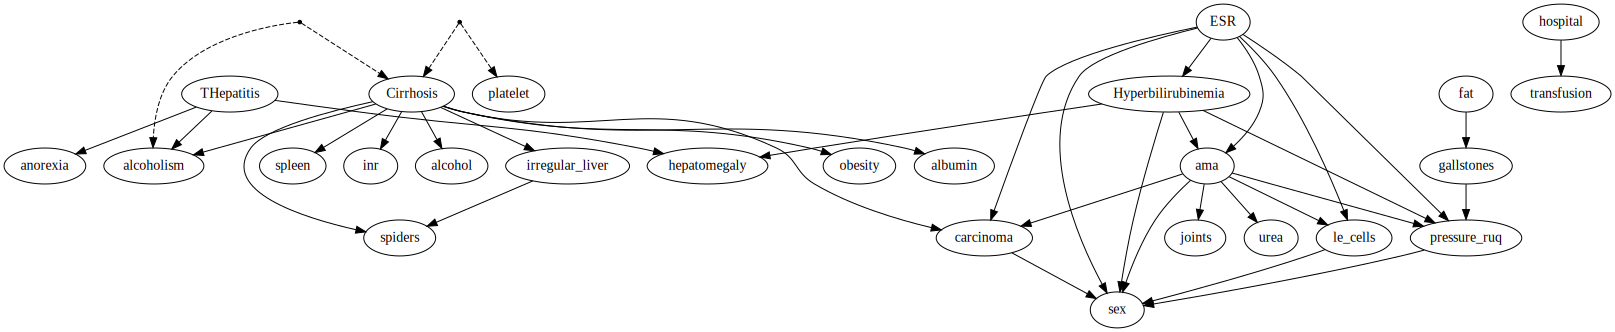

In [10]:
results[1].causal_graph_with_latent_edges.draw()

In [11]:
results[1].latent_edges

[('Cirrhosis', 'platelet'), ('Cirrhosis', 'alcoholism')]